# Machine Learning 
## LDA, QDA, and logistic regression on The South African Heart Disease data


#### Data decscription:
The South African Heart Disease data set (consisting of patients with several medical variables recorded and the response variable 'chd' which indicates the presence (1) or absence (0) of coronary heart disease. (Data file is located in the files section.) (Note: one of the columns indicates the 'Presence' or 'Absence' of a family history of heart disease. The scikit-learn LDA and QDA models will accept text for the response variable, but not for a predictor variable, so this will need to be dealt with before running the models.)





### This Analysis is split into two parts
1. **Heart Disease Analysis Modelling:** <br>
    1.1 Logistic Regression Analysis (LRA)<br>
    1.2 Linear Discriminent Analysis (LDA)<br>
    1.3 Quadratic Discriminent Analysis (QDA)<br>


In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats




In [8]:
fpath = "/Users/mo/Desktop/Desktop/School/USF/Courses/Spring 2021/Statistic Modeling/Lec5 + HW 4/SA_heart_dis.csv"
dis = pd.read_csv(fpath)
dis


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [9]:
dis["famhist"] = dis["famhist"].astype(str)

In [10]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
dis['famhist'] = lb.fit_transform(dis['famhist'])


## Corralation Discovery

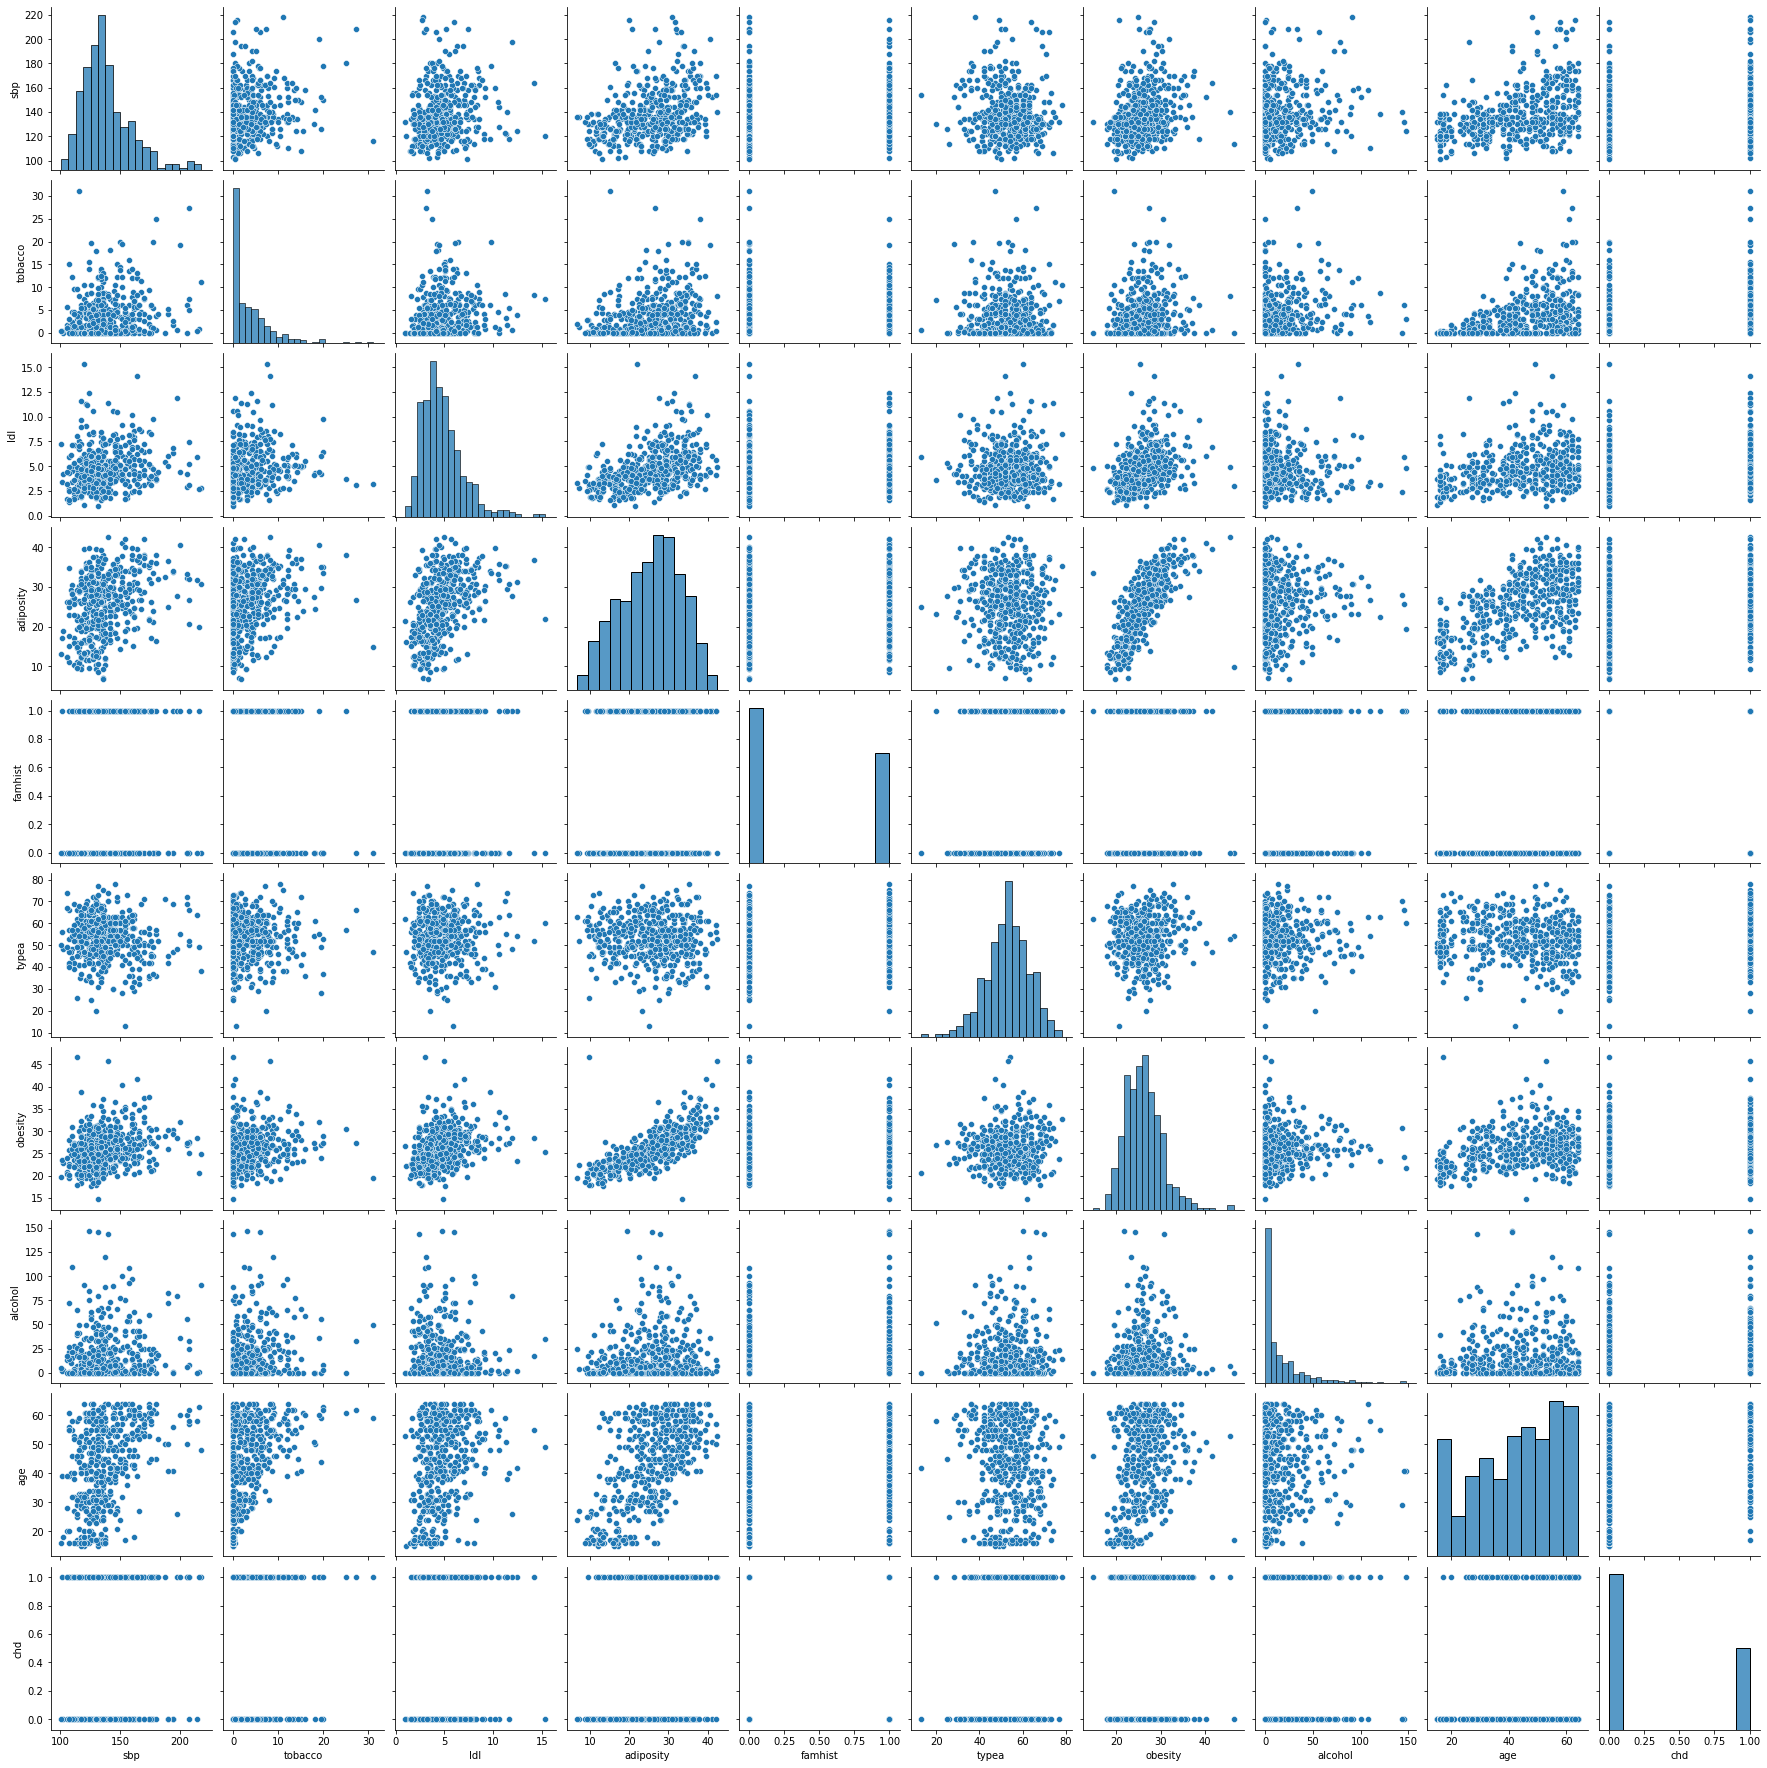

In [11]:
sns.pairplot(dis)

# 1 Data Preparation:
#### splitting data 20/80

In [12]:
train = np.random.rand(len(dis)) < .8
dis_train = dis[train]
dis_test = dis[~train]
print(dis_train.shape,dis_test.shape)


(377, 10) (85, 10)


In [13]:
# predictor variables
pred = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age']


# 1.1 Logistic Model for Heart Disease Data

In [14]:
dis_model_log = smf.logit(formula = 'chd ~ sbp + tobacco + ldl + adiposity \
                          + famhist + typea +obesity + alcohol + age', data=dis_train).fit()

dis_model_log.summary()


Optimization terminated successfully.
         Current function value: 0.522206
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  377
Model:                          Logit   Df Residuals:                      367
Method:                           MLE   Df Model:                            9
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                  0.1872
Time:                        02:15:47   Log-Likelihood:                -196.87
converged:                       True   LL-Null:                       -242.21
Covariance Type:            nonrobust   LLR p-value:                 1.191e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3840      1.422     -3.785      0.000      -8.172      -2.596
sbp            0.0071      0.006      1.170      0.242      -0.005       0.019
tobacco        0.0622      0.031      1.976      0.048       0.001       0.124
ldl            0.1625      0.064      2.543      0.011       0.037       0.288
adiposity      0.0256      0.032      0.798      0.425      -0.037       0.089
famhist        0.8315      0.249      3.345      0.001       0.344       1.319
typea          0.0376      0.014      2.718      0.007       0.010       0.065
obesity       -0.0933      0.048     -1.923      0.054      -0.188       0.002
alcohol        0.0016      0.005      0.325      0.745      -0.008       0.011
age            0.0451      0.013      3.460      0.001       0.020       0.071
==============================================================================
"""

In [15]:
dis_model_log_small = smf.logit(formula = 'chd ~ sbp + tobacco + ldl + adiposity \
                           + typea +obesity + alcohol + age', data=dis_train).fit()
dis_model_log_small.summary()


Optimization terminated successfully.
         Current function value: 0.537185
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  377
Model:                          Logit   Df Residuals:                      368
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                  0.1639
Time:                        02:15:55   Log-Likelihood:                -202.52
converged:                       True   LL-Null:                       -242.21
Covariance Type:            nonrobust   LLR p-value:                 6.505e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2797      1.386     -3.810      0.000      -7.996      -2.563
sbp            0.0063      0.006      1.045      0.296      -0.005       0.018
tobacco        0.0628      0.031      2.006      0.045       0.001       0.124
ldl            0.1818      0.064      2.843      0.004       0.056       0.307
adiposity      0.0234      0.031      0.750      0.453      -0.038       0.084
typea          0.0378      0.014      2.778      0.005       0.011       0.065
obesity       -0.0873      0.047     -1.861      0.063      -0.179       0.005
alcohol        0.0022      0.005      0.459      0.646      -0.007       0.012
age            0.0493      0.013      3.871      0.000       0.024       0.074
==============================================================================
"""

### Analysis: the LLf and Pseudo R-squ has gone higher when we added famhist variable as predictor

In [16]:
print("The Log-Likelihood for This Model:" + str(dis_model_log.llf))
print("The Log-Likelihood for smaller Model:" + str(dis_model_log_small.llf))
stat=2*(dis_model_log.llf-dis_model_log_small.llf)
diff_llf = 1-stats.chi2.cdf(stat,1)
print("The difference between the two Models is: "+ str(diff_llf))



The Log-Likelihood for This Model:-196.8716502712077
The Log-Likelihood for smaller Model:-202.51856772575658
The difference between the two Models is: 0.0007776488641885182


### After fitting the model and chose larger model, now I will predict the target of chd

In [17]:
dis_col_pred = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age']

In [18]:
dis_test_pred = dis_test.copy()
dis_test_pred["predicted_probability"] = dis_model_log.predict(dis_test[dis_col_pred])
dis_test_pred

dis_threshold = 0.5
dis_test_pred["prediction_result"]= np.where(dis_test_pred['predicted_probability'] >= dis_threshold, 1,0)     
dis_test_pred

dis_cross = pd.crosstab(dis_test_pred['chd'],dis_test_pred['prediction_result'])
dis_cross =dis_cross.rename(index={0:"Absence", 1:'Presence'}, columns={0:'Absence', 1:'Presence'})

dis_cross['total'] = dis_cross.sum(axis=1)
dis_cross.loc['total'] = dis_cross.sum()
dis_cross

prediction_result,Absence,Presence,total
chd,,,
Absence,48,6,54
Presence,12,19,31
total,60,25,85


In [19]:
n = dis_cross
threshhold = dis_threshold

sucesses = (n.iloc[1][1]+n.iloc[0][0])
total = ((n.iloc[2][2]))
tota_correct_prediction = sucesses/total
presence = n.iloc[1][1]/n.iloc[1][0]
absence = n.iloc[0][1]/n.iloc[0][0]
the_odds_ratio = presence/absence

print("The total rate of correct prediction is: "+str(tota_correct_prediction)+" with threshold of "\
      +str(threshhold))
print("The Odd of success for Presence: " \
      +str(presence)+ " with threshold of: " + str(threshhold))
print("The Odd of success for Absence: " \
      +str(absence) + " with threshold of: " + str(threshhold))
print("The Odds Ratio of success for presence and absence is "+str(the_odds_ratio))





The total rate of correct prediction is: 0.788235294117647 with threshold of 0.5
The Odd of success for Presence: 1.5833333333333333 with threshold of: 0.5
The Odd of success for Absence: 0.125 with threshold of: 0.5
The Odds Ratio of success for presence and absence is 12.666666666666666


### Analysis: this mean the odd of presence of chd is 4 times higher than absence group.


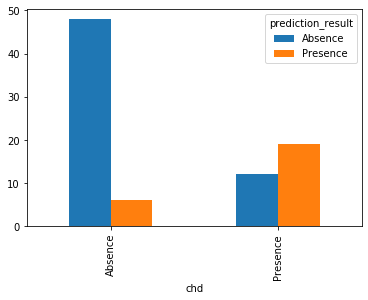

In [20]:
dis_cross.iloc[0:2, 0:2].plot(kind='bar')
          

# 1.2 Linear Discriminant Analysis (LDA) for Heart Disease Data


In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.metrics as metrics


X = dis_train[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
               'alcohol', 'age']]
Y = dis_train['chd']
lda_mod = LinearDiscriminantAnalysis()
lda_mod.fit(X, Y)



LinearDiscriminantAnalysis()

In [22]:
X_test = dis_test_pred[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity','alcohol', 'age']]
Y_test = dis_test_pred['chd']


In [23]:
dis_test_pred['LDAprobs'] = lda_mod.predict_proba(X_test)[:,1]
dis_test_pred['LDApreds'] = lda_mod.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(dis_test_pred['chd'], dis_test_pred['LDAprobs'])
roc_auc = metrics.auc(fpr, tpr)



In [24]:
roc_auc


0.8488649940262843

In [25]:
diss_cross_LDA=pd.crosstab(dis_test_pred['chd'],dis_test_pred['LDApreds'])
diss_cross_LDA


LDApreds,0,1
chd,,
0,48,6
1,11,20


In [26]:
x = diss_cross_LDA

false_pos = x.iloc[0][1]
true_pos = x.iloc[1][1]
all_pos_predictions = x.iloc[:,1].sum()

print("False Positive: " + str(false_pos))
print("True Positive: " + str(true_pos))

successes_LDA = (x.iloc[1][1]+x.iloc[0][0])

tota_correct_prediction_LDA = successes_LDA/len(dis_test)

print("The Total Rate of Correct Prediction in LDA: "+str(tota_correct_prediction_LDA))





False Positive: 6
True Positive: 20
The Total Rate of Correct Prediction in LDA: 0.8


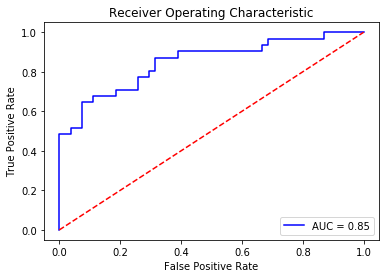

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([-0.02, 1])
#plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Analysis: from the graph above, we see that our model is  predicting as good as possible,since the the higher the True Positive, the Higher we pick False Positive. We noticed that our Area Under Curve (AUC) is 0.78 which is fairly closer to 1 and that is good classifier.

# 1.3 Quadratic Discriminant Analysis for Heart Disease Data

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [29]:
qda = QuadraticDiscriminantAnalysis()

X_qda = dis_test[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity','alcohol', 'age']]
Y_qda = dis_test['chd']

qda.fit(X_qda, Y_qda)



QuadraticDiscriminantAnalysis()

In [30]:
diss_qda_cross=pd.crosstab(Y_qda,qda.predict(X_qda))
diss_qda_cross

col_0,0,1
chd,,
0,50,4
1,7,24


In [31]:
tota_correct_prediction_QDA = (diss_qda_cross[0][0]+diss_qda_cross[1][1])/len(dis_test)

print("The Total Rate of Correct Prediction in QDA: "+str(tota_correct_prediction_QDA))
print("The Total Rate of Correct Prediction in LDA: "+str(tota_correct_prediction_LDA))


The Total Rate of Correct Prediction in QDA: 0.8705882352941177
The Total Rate of Correct Prediction in LDA: 0.8


### Analysis: we notice that QDA is significantly better and higher than LDA. Thus, it allows for nonlinear (quadratic) decision boundary. It will have better at estimating covariance matrix from the data.